# Investigating Covid-19 Virus Trends (January 2020 - July 2020)

## Project Overview

This project analyzes the trends of COVID-19 in various countries during the initial six months of the pandemic, from January 2020 to July 2020. We will utilize a dataset sourced from Kaggle.com to investigate the virus's early spread and impact.

## Project Questions

This analysis is structured to provide answers to the following inquiries:

1. Which countries have had the highest number of deaths due to COVID-19?

2. Which countries have had the highest number of positive cases against the number of tests?

3. Which countries have made the best effort in terms of the number of COVID-19 tests conducted related to their population?

4. Which countries were ultimately the most and the least affected related to their population?

## Import Libraries and Read in Data

To begin, we will import the Python libraries essential for data analysis and then proceed to load the data

In [1]:
# Import Pandas and Numpy for data manipulation and wrangling
import pandas as pd
import numpy as np
import ancillary_func as an

# Import matplotlib and seaborn for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'white', palette = 'muted')

# Read in Data
covid = pd.read_csv('covid_19.csv')

# Display the first five records of the first five columns
an.get_table(covid.iloc[:, :5].head())

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State
0,2020-01-20,Asia,KR,South Korea,All States
1,2020-01-22,North America,US,United States,All States
2,2020-01-22,North America,US,United States,Washington
3,2020-01-23,North America,US,United States,All States
4,2020-01-23,North America,US,United States,Washington


## Data Understanding

Having successfully loaded the dataset, we will proceed to explore its structure and fundamental properties.

### Inspect the Data
    
We have already viewed the first five records of our dataset, now we will check the number of rows and columns of our data.

In [2]:
# Display DataFrame's dimensions
shape = covid.shape
print(f"Our dataset has {shape[0]} rows and {shape[1]} columns.")

Our dataset has 10903 rows and 14 columns.


### Understanding the Variables

In this section, we will determine the data types of each variable, identify any missing values, and offer a concise explanation for each column.

In [3]:
# View general information
df_info = an.df_info_table(covid)
an.get_table(df_info)

,Column,Non-Null Count,Dtype,Null Count,Unique Values
0,Date,10903,object,0,133
1,Continent_Name,10903,object,0,6
2,Two_Letter_Country_Code,10903,object,0,109
3,Country_Region,10903,object,0,109
4,Province_State,10903,object,0,81
5,positive,10903,int64,0,5527
6,hospitalized,10903,int64,0,1368
7,recovered,10903,int64,0,2392
8,death,10903,int64,0,1773
9,total_tested,10903,int64,0,8703


Our dataset consists of **10,903** entries (rows) and **14** variables (columns). Importantly, there are no missing values present. The dataset features **5** columns with object data types, representing strings, and **9** columns with int64 data types, indicating integers. The following section provides a detailed explanation of each column:

1. `Date`: Date.

2. `Continent_Name`: Continent names.

3. `Two_Letter_Country_Code`: Country codes.

4. `Country_Region`: Country names.

5. `Province_State`: States/province names; value is All States when state/provincial level data is not available.

6. `positive`: Cumulative number of positive cases reported.
    
7. `hospitalized`: Cumulative number of hospitalized cases reported.

8. `recovered`: Cumulative number of recovered cases reported.
    
9. `death`: Cumulative number of deaths reported.

10. `total_tested`: Cumulative number of tests conducted.

11. `active`: Number of actively cases on that day.
    
12. `hospitalizedCurr`: Number of actively hospitalized cases on that day.

13. `daily_tested`: Number of tests conducted on the day; if daily data is unavailable, daily tested is averaged across number of days in between.

14. `daily_positive`: Number of positive cases reported on the day; if daily data is unavailable, daily positive is averaged across number of days in.
    
### Check for Duplicates.
    
We will check if our dataset has duplicated records.

In [4]:
# Check for duplicated rows
covid.duplicated().sum()

np.int64(0)

Our dataset do not have duplicates.

### Summary Statistics

With no missing values or duplicates identified, we will now generate the summary statistics to provide a general statistical overview of the data. 

In [5]:
# Summary Statistics for numeric columns
an.get_table(covid.describe())

,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
count,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000,10903.000000
mean,17768.015684,766.402550,2409.220490,947.592956,195475.719618,4472.194717,454.074475,6841.403283,497.884619
std,93143.458932,5626.325766,11254.209177,5507.242206,819022.182327,22277.479931,2253.045376,27198.457892,2354.834051
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,-330230.000000,-4735.000000
25%,44.000000,0.000000,0.000000,0.000000,2147.500000,0.000000,0.000000,71.000000,1.000000
50%,1026.000000,0.000000,0.000000,6.000000,30358.000000,0.000000,0.000000,1048.000000,29.000000
75%,7440.000000,0.000000,500.500000,136.000000,125285.000000,660.500000,28.000000,4688.500000,264.000000
max,1783570.000000,89590.000000,171883.000000,98536.000000,16936891.000000,280931.000000,33004.000000,492276.000000,63047.000000


In [6]:
# Summary Statistics for qualitative columns
an.get_table(covid.describe(include = ['object']))

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State
count,10903,10903,10903,10903,10903
unique,133,6,109,109,81
top,2020-05-05,North America,US,United States,All States
freq,142,6452,5032,5032,3781


## Data Cleaning

To prepare the data for analysis and address our research questions, we will perform data cleaning. This will involve standardizing column names, filtering the dataset to include only the necessary rows, dropping irrelevant columns, and converting the **Date** column to the **DateTime** data type.
    
### Cleaning Column Names
    
We will now standardize the column names for consistency and readability. 

In [7]:
# making column names all lowercase
covid.columns = covid.columns.str.lower()

# renaming hospitalized column
covid.rename(columns = {'hospitalizedcurr': 'hospitalized_curr'}, inplace = True)

# Display the cleaned column names
for i in covid.columns:
    print(i)

date
continent_name
two_letter_country_code
country_region
province_state
positive
hospitalized
recovered
death
total_tested
active
hospitalized_curr
daily_tested
daily_positive


### Change `date` Column DataType

We will change `date` to **datetime** datatype.

In [8]:
# Convert data column to datetime datatype
covid['date'] = pd.to_datetime(covid['date'])

# Display the datatype for date column
print(covid['date'].dtype)

datetime64[ns]


### Isolating the Data we Need

We will now refine our dataset by filtering it to retain only records representing entire countries. Upon initial inspection, the **province_state** column revealed a mix of country and individual state data, potentially leading to analytical bias. As an example, the United States includes both national and state-level data points. To maintain data integrity, we will filter the dataset to country-level entries and assign the result to the **covid_all_states** variable.

In [9]:
# All states data
covid_all_states = covid[covid['province_state'] == 'All States'].reset_index(drop = True)
shape = covid_all_states.shape

# Display the dimensions
print(f"New number of rows is {shape[0]}.", f"The number of columns is maintained, we still have {shape[1]} columns.", sep='\n')

New number of rows is 3781.
The number of columns is maintained, we still have 14 columns.


Following the country-level filtering, the dataset now contains **3,781** records, down from the original **10,903**. To effectively analyze trends in both cumulative and daily data, we will partition the dataset into two distinct DataFrames: **covid_all_states_cumulative** for cumulative measures and **covid_all_states_daily** for daily measures.

In [10]:
# Columns related to cummulative measures
covid_all_states_cummulative = covid_all_states[['date', 'continent_name', \
                                                 'two_letter_country_code', 'positive',\
                                                 'hospitalized', 'recovered', 'death', 'total_tested']]

# Columns related to daily measures
covid_all_states_daily = covid_all_states[['date', 'country_region', 'active', 'hospitalized_curr', 'daily_tested', 'daily_positive']]

# View the dimensions of the the datasets to confirm if filtering has been successful
print(covid_all_states_cummulative.shape, covid_all_states_daily.shape, sep='\n')

(3781, 8)
(3781, 6)


With the dataset filtered to include relevant data points, we can now begin addressing our research questions.

## Identifying Countries with the Highest Number of Deaths

To identify the countries with the highest cumulative death counts, we will group the **covid_all_states_cumulative** DataFrame by **two_letter_country_code** and determine the maximum cumulative deaths for each country. We will then display the top ten countries with the highest death counts in both a table and a horizontal bar chart.

In [11]:
# A pivot table for cummulative deaths by country
covid_deaths_cum = covid_all_states_cummulative.\
pivot_table(values = 'death', index = 'two_letter_country_code', aggfunc = 'max').sort_values(by = 'death', ascending = False).head(10)
covid_deaths_cum.index = ['United States', 'Italy', 'United Kingdom', 'Belgium', 'Russua', 'Turkey', 'Sweden', 'Canada', 'New Zealand', 'Poland']
covid_deaths_cum.columns = ['Cummulative Deaths']
covid_deaths_cum_table = covid_deaths_cum.copy()
covid_deaths_cum_table.reset_index(inplace = True)
covid_deaths_cum_table.rename(columns = {'index': 'Country Name'}, inplace = True)
an.get_table(covid_deaths_cum_table)

,Country Name,Cummulative Deaths
0,United States,98536
1,Italy,33415
2,United Kingdom,33186
3,Belgium,8903
4,Russua,4693
5,Turkey,4540
6,Sweden,4395
7,Canada,3682
8,New Zealand,1421
9,Poland,1065


As evident from the table, the **United States of America** records the highest number of cumulative deaths, with **Italy** in second place. We will proceed to visualize this data.

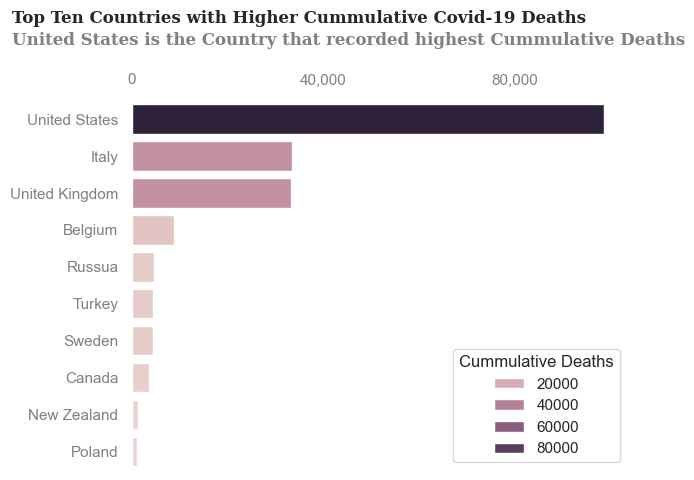

In [12]:
sns.barplot(data = covid_deaths_cum, orient = 'h', x = 'Cummulative Deaths', y = covid_deaths_cum.index, hue = 'Cummulative Deaths')
sns.despine(left = True, bottom = True)
plt.ylabel('')
plt.xlabel('')
plt.xticks([0, 40000, 80000 ], ['0', '40,000', '80,000'])
plt.tick_params(labelcolor = 'gray')
plt.tick_params(labeltop = True, labelbottom = False)
plt.text(x = -25000, y = -2.6, s = 'Top Ten Countries with Higher Cummulative Covid-19 Deaths', fontdict = {'weight':'bold', 'family':'serif'})
plt.text(x = -25000, y = -2, s = 'United States is the Country that recorded highest Cummulative Deaths',\
         fontdict = {'weight':'bold', 'family':'serif', 'color':'gray'})
plt.show()

We can use the table and chart to answer our first question: **Which countries have had the highest number of deaths due to Covid-19**?

_**Answer**_: 

1. **United States of America**: Cummulative Deaths of **98,536**.

2. **Italy**: Cummulative Deaths of **33,425**.

3. **United Kingdom**: Cummulative Deaths of **33,186**.

## Extracting the Top Ten Tested Cases Countries

We aim to determine the countries with the highest volume of tested and confirmed COVID-19 cases. To achieve this, we will analyze columns related to **active**, **hospitalized**, **daily positive**, and **daily tested** cases within the **covid_all_states_daily** DataFrame. The results will be presented in a table, followed by visualizations highlighting significant insights.

In [13]:
# Determine the top ten tested cases
covid_all_states_daily_sum = covid_all_states_daily.groupby('country_region')[['active', 'hospitalized_curr', 'daily_tested', 'daily_positive']].sum()
covid_all_states_daily_sum.rename(columns={'daily_tested':'tested', 'daily_positive':'positive', 'hospitalized_curr':'hospitalized'}, inplace = True)
covid_all_states_daily_sum_sorted = covid_all_states_daily_sum.sort_values(by = 'tested', ascending = False)
covid_top_ten = covid_all_states_daily_sum_sorted.head(10)
covid_top_ten.index.name = None
an.get_table(covid_top_ten)

,active,hospitalized,tested,positive
United States,0,0,17282363,1877179
Russia,6924890,0,10542266,406368
Italy,6202214,1699003,4091291,251710
India,0,0,3692851,60959
Turkey,2980960,0,2031192,163941
Canada,56454,0,1654779,90873
United Kingdom,0,0,1473672,166909
Australia,134586,6655,1252900,7200
Peru,0,0,976790,59497
Poland,538203,0,928256,23987


The table indicates that the **United States of America** and **Russia** have conducted the highest number of COVID-19 tests. We will use this data for further analysis, specifically to address the relationship between positive cases and the number of tests. For now, let's visualize the top ten countries with the most COVID-19 tests.

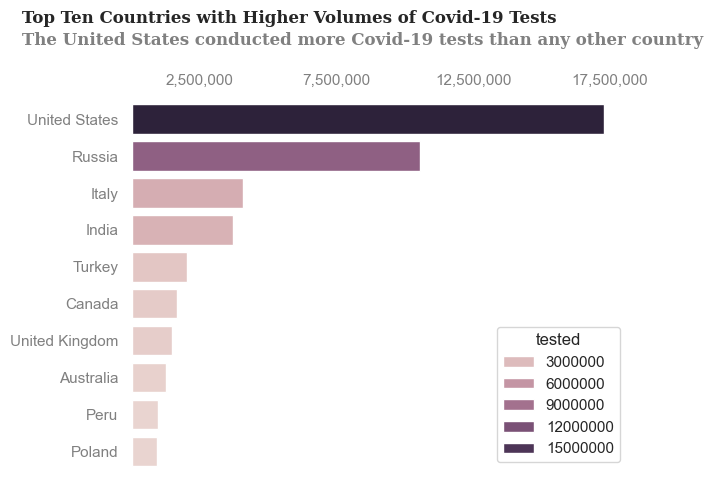

In [14]:
# Visualization
sns.barplot(data=covid_top_ten, orient = 'h', x='tested', y=covid_top_ten.index, hue = 'tested')
sns.despine(left = True, bottom = True)
plt.ticklabel_format(axis = 'x', style = 'plain')
plt.xticks([2500000, 7500000, 12500000, 17500000], ['2,500,000', '7,500,000', '12,500,000', '17,500,000'])
plt.text(x = -4000000, y = -2.6, s = 'Top Ten Countries with Higher Volumes of Covid-19 Tests', fontdict = {'weight':'bold', 'family':'serif'})
plt.text(x = -4000000, y = -2, s = 'The United States conducted more Covid-19 tests than any other country',\
         fontdict = {'weight':'bold', 'family':'serif', 'color':'gray'})
plt.tick_params(labeltop = True, labelbottom = False)
plt.tick_params(labelcolor = 'gray')
plt.ylabel('')
plt.xlabel('')
plt.show()

## Identifying the Highest Positive Against Tested Cases

In this section, we will calculate the COVID-19 **positivity rate**, defined as the proportion of positive test results to the total number of tests performed. Utilizing the table from the preceding analysis, which identified the ten countries with the highest testing volumes, we will determine the countries with the highest positivity rates. The formula for calculating the positivity rate is as follows:

$
Positivity Rate = \left(\frac{Positive Cases}{Total Number of People Tested}\right)*100
$

A **positivity_rate** column will be appended to the **covid_top_ten** DataFrame, and the modified DataFrame will be assigned to the variable **positivity_rated**.

In [15]:
positivity_rated = covid_top_ten.copy()
positivity_rated['positivity_rate'] = (positivity_rated['positive']/positivity_rated['tested'])*100
top_ten_positivity_rated = positivity_rated.sort_values(by='positivity_rate', ascending = False).head(10)['positivity_rate'].reset_index()
top_ten_positivity_rated.rename(columns = {'index': 'Country Name'}, inplace = True) 
an.get_table(top_ten_positivity_rated)

,Country Name,positivity_rate
0,United Kingdom,11.326062
1,United States,10.861819
2,Turkey,8.071172
3,Italy,6.152337
4,Peru,6.091074
5,Canada,5.491549
6,Russia,3.854655
7,Poland,2.584093
8,India,1.650730
9,Australia,0.574667


We can now answer the second question: **Which countries have had the highest number of positive cases against the number of tests**?

_**Answer**_: 

1. **United Kingdom**: Positivity Rate of **11%**.

2. **United States**: Positivity Rate of **10.8%**.

3. **Turkey**: Positivity Rate of **8%**.

Let us create a chart for our findings.

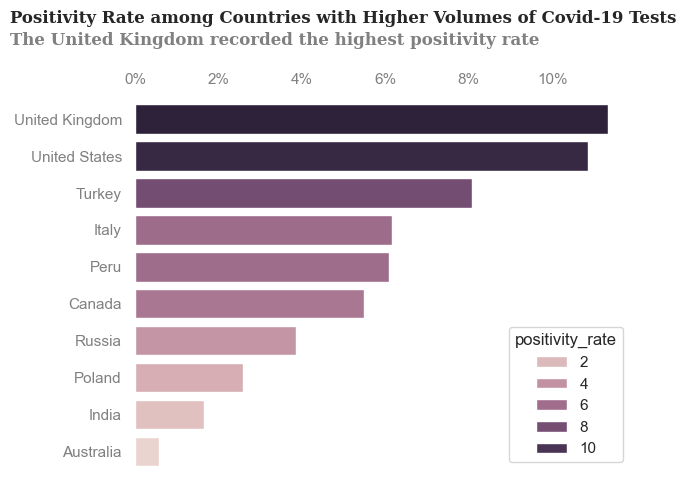

In [16]:
# Visualization
sns.barplot(data = top_ten_positivity_rated, x = 'positivity_rate',\
             y = 'Country Name', orient = 'h', hue = 'positivity_rate')
sns.despine(left = True, bottom = True)
plt.text(x = -3, y = -2.6, s = 'Positivity Rate among Countries with Higher Volumes of Covid-19 Tests', fontdict = {'weight':'bold', 'family':'serif'})
plt.text(x = -3, y = -2, s = 'The United Kingdom recorded the highest positivity rate',\
         fontdict = {'weight':'bold', 'family':'serif', 'color':'gray'})
plt.xticks([0, 2, 4, 6, 8, 10], ['0%', '2%', '4%', '6%', '8%', '10%'])
plt.tick_params(labelcolor = 'gray')
plt.ylabel('')
plt.xlabel('')
plt.tick_params(labeltop = True, labelbottom = False)
plt.grid(False)
plt.show()

## Scaling of Data to Population Level

### Number of Tested Cases Against Total Population

In the first six months of the pandemic, testing volume was frequently cited as an indicator of a country's effective pandemic response. We will evaluate the correlation between testing volume and population size by examining the top ten countries with the highest test counts. Using population data for these countries during that timeframe, we will normalize their total COVID-19 test figures.

To proceed, we will add a population column to the **covid_top_ten** DataFrame. The population data for the top ten countries with the most COVID-19 tests is provided below: 

1. `United States`: 331,002,651

2. `Russia`: 145,934,462

3. `Italy`: 60,461,826

4. `India`: 1,380,004,385

5. `Turkey`: 84,339,067

6. `Canada`: 37,742,154

7. `United Kingdom`: 67,886,011

8. `Australia`: 25,499,884

9. `Peru`: 32,971,854

10. `Poland`: 37,846,611

These population figures will be utilized to construct a single DataFrame that incorporates the test counts and population data for each of the ten countries with the highest test volumes.

In [17]:
# population list
pop_dict = {'population':[331002651, 145934462, 60461826, 1380004385, 84339067, 37742154, 67886011, 25499884, 32971854, 37846611]}
pop = pd.DataFrame(pop_dict)
pop.index = ['United States', 'Russia', 'Italy', 'India', 'Turkey', 'Canada', 'United Kingdom', 'Australia', 'Peru', 'Poland']
covid_top_ten_pop = covid_top_ten
covid_top_ten_pop = pd.merge(left = covid_top_ten_pop, right = pop, left_index= True, right_index= True)
an.get_table(covid_top_ten_pop)

,active,hospitalized,tested,positive,population
United States,0,0,17282363,1877179,331002651
Russia,6924890,0,10542266,406368,145934462
Italy,6202214,1699003,4091291,251710,60461826
India,0,0,3692851,60959,1380004385
Turkey,2980960,0,2031192,163941,84339067
Canada,56454,0,1654779,90873,37742154
United Kingdom,0,0,1473672,166909,67886011
Australia,134586,6655,1252900,7200,25499884
Peru,0,0,976790,59497,32971854
Poland,538203,0,928256,23987,37846611


Utilizing the data in the table, we will generate a column representing the proportion of each country's population that has been tested. This will be achieved by adding a column labeled **percentage_tested** and applying the following formula:

$
Population Scale = \left(\frac{Tested Population}{Total Population}\right)*100
$

We will be calculating the percentage of the population that tested for covid-19 in the first six months of the pandemic.

In [18]:
covid_top_ten_pop['percentage_tested'] = (covid_top_ten_pop['tested']/covid_top_ten_pop['population'])*100
an.get_table(covid_top_ten_pop[['tested', 'population', 'percentage_tested']])

,tested,population,percentage_tested
United States,17282363,331002651,5.221216
Russia,10542266,145934462,7.223973
Italy,4091291,60461826,6.766734
India,3692851,1380004385,0.267597
Turkey,2031192,84339067,2.408364
Canada,1654779,37742154,4.384432
United Kingdom,1473672,67886011,2.170804
Australia,1252900,25499884,4.913356
Peru,976790,32971854,2.962496
Poland,928256,37846611,2.452679


If we go by the above output, we can be able to answer the third question: **Which countries have made the best effort in terms of the number of covid-19 tests conducted related to their population**?

_**Answer**_:

1. **Russua**- Percentage of the population tested: **7%**.

2. **Italy**- Percentage pf the population tested: **6.8%**.

3. **United States**- Percentage of the population tested: **5%**.

Utilizing similar methods employed in the preceding analysis, we will determine the **active**, **hospitalized**, and **positive** COVID-19 case rates per capita for the countries with the most extensive testing. These calculations will provide insights for our project's concluding research question.
    
### Variables as Fractions of their Population Levels

In [19]:
covid_top_ten_percentage = covid_top_ten_pop.iloc[:, :-1]
covid_top_ten_percentage['active'] = (covid_top_ten_percentage['active']/covid_top_ten_percentage['population'])*100
covid_top_ten_percentage['hospitalized'] = (covid_top_ten_percentage['hospitalized']/covid_top_ten_percentage['population'])*100
covid_top_ten_percentage['tested'] = (covid_top_ten_percentage['tested']/covid_top_ten_percentage['population'])*100
covid_top_ten_percentage['positive'] = (covid_top_ten_percentage['positive']/covid_top_ten_percentage['population'])*100
covid_top_ten_percentage.rename(columns = {'active':'active_cases', 'hospitalized':'hospitalized_cases',\
                                           'tested':'tested_cases', 'positive':'positive_cases'}, inplace = True)
covid_top_ten_percentage.drop('population', axis = 1, inplace = True)
an.get_table(covid_top_ten_percentage)

,active_cases,hospitalized_cases,tested_cases,positive_cases
United States,0.000000,0.000000,5.221216,0.567119
Russia,4.745205,0.000000,7.223973,0.278459
Italy,10.258066,2.810042,6.766734,0.416312
India,0.000000,0.000000,0.267597,0.004417
Turkey,3.534495,0.000000,2.408364,0.194383
Canada,0.149578,0.000000,4.384432,0.240773
United Kingdom,0.000000,0.000000,2.170804,0.245867
Australia,0.527791,0.026098,4.913356,0.028235
Peru,0.000000,0.000000,2.962496,0.180448
Poland,1.422064,0.000000,2.452679,0.063380


Despite presenting the data as percentages of total population, the wide range of values makes it difficult to assess the relative impact of COVID-19 across countries. To facilitate this assessment, we will rank each data point within its respective category, sum the ranks for each country, and create a **total_ranks** column. Sorting the table by **total_ranks** in descending order will allow us to identify the countries most significantly impacted by the pandemic.

In [20]:
covid_top_ten_percentage_ranked = covid_top_ten_percentage.rank()
covid_top_ten_percentage_ranked['total_ranked'] = covid_top_ten_percentage_ranked.sum(axis=1)
covid_top_ten_percentage_ranked.rename(\
    columns={'active_cases':'active_rank',\
             'hospitalized_cases':'hosp_rank',\
             'tested_case':'tested_rank', 'positive_cases':'pos_rank'}, inplace = True)
covid_top_ten_percentage_ranked.sort_values(by='total_ranked', ascending = False, inplace = True)
an.get_table(covid_top_ten_percentage_ranked)

,active_rank,hosp_rank,tested_cases,pos_rank,total_ranked
Italy,10.000000,10.000000,9.000000,9.000000,38.000000
Russia,9.000000,4.500000,10.000000,8.000000,31.500000
United States,2.500000,4.500000,8.000000,10.000000,25.000000
Australia,6.000000,9.000000,7.000000,2.000000,24.000000
Canada,5.000000,4.500000,6.000000,6.000000,21.500000
Turkey,8.000000,4.500000,3.000000,5.000000,20.500000
Poland,7.000000,4.500000,4.000000,3.000000,18.500000
United Kingdom,2.500000,4.500000,2.000000,7.000000,16.000000
Peru,2.500000,4.500000,5.000000,4.000000,16.000000
India,2.500000,4.500000,1.000000,1.000000,9.000000


This table contains answers for our last question: **Which Countries were ultimately the most and the least affected related to their population**?

**The most affected country in relation to its population**:

* Italy
 
**The least affected country in relation to its population**:

* India

## Findings

1. During the initial six months of the pandemic, the **United States of America**, **Italy**, and the **United Kingdom** experienced the highest number of COVID-19 fatalities.

2. During the initial six months of the pandemic, the **United Kingdom**, the **United States of America**, and **Turkey** reported the highest ratios of positive COVID-19 cases to tests conducted.

3. During the initial six months of the pandemic, **Russia**, **Italy**, and the **United States of America** exhibited the highest rates of COVID-19 testing per capita.

4. During the initial six months of the pandemic, **Italy** experienced the greatest impact relative to its population, while **India** experienced the least.

## Conclusion 
    
This project analyzed COVID-19's impact and testing responses in various countries from January to July 2020, using a Kaggle dataset. After data cleaning and filtering, we identified the United States, Italy, and the United Kingdom as having the highest death tolls, while the United Kingdom, the United States, and Turkey reported the highest positivity rates. Russia, Italy, and the United States exhibited the most extensive testing per capita. By ranking and aggregating population-adjusted data, we concluded that Italy was the most affected country relative to its population, and India the least, highlighting the diverse pandemic impacts and responses during the crucial first six months.